[0.1, 0.01, 0.001]


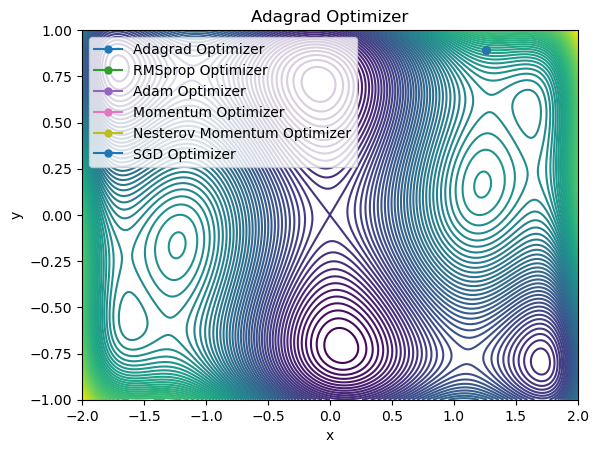

Adagrad Optimizer
[[1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]]
RMSprop Optimizer
[[1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]]
Adam Optimizer
[[1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]]
Momentum Optimizer
[[1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]
 [1.26233127 0.89053904]]
Nesterov Momentum Optimizer
[[1.26233127 0.89053904]
 [1.26233127 0.89053904

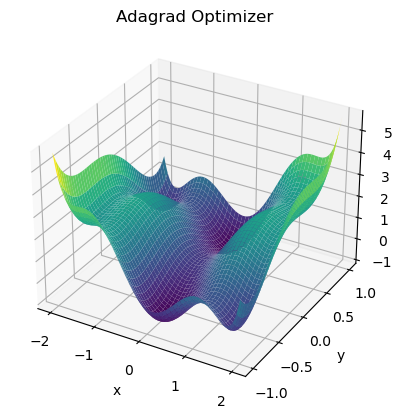

In [170]:
import numpy as np
import matplotlib.pyplot as plt

def six_hump_camel(x, y):
    return (4 - 2.1 * x**2 + (x**4) / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

def gradient_six_hump_camel(p):
    x, y = p[0], p[1]
    df_dx = 2 * x * (2.1 * x**2 - 4) + y
    df_dy = x + 8 * y**3 - 8 * y
    return np.array([df_dx, df_dy])

from mpl_toolkits.mplot3d import Axes3D

def plot_surface_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = target_function(X, Y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(titles[0])
    
    for path, title in zip(paths, titles):
        path = np.array(path)
        print(title)
        print(path)
        ax.plot(path[:, 0], path[:, 1], [target_function(p[0], p[1]) for p in path], marker='o', markersize=5, label= title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    #ax.legend()
    plt.show()

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = target_function(X, Y)

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)
        plt.plot(path[:, 0], path[:, 1], linestyle='-', linewidth=1)
        
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()

def adagrad_optimizer(target_function, initial_p, target_error, max_steps, learning_rates):
    p = initial_p
    path = [p]

    G = np.zeros_like(p)  # Initialize G outside the learning rate loop

    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            gradient = gradient_six_hump_camel(p)
            G += gradient ** 2
            prev_p = p
            p -= (lr  / (np.sqrt(G + 1e-7)))* gradient
            step_path.append(p)

            if np.linalg.norm(prev_p - p) < target_error:
                break
        path.extend(step_path)

    return path


def rmsprop_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, gamma, epsilon):
    p = initial_p
    path = [p]
    G = np.zeros_like(p)  # Initialize G for the current learning rate
    
    print(learning_rates)
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            gradient = gradient_six_hump_camel(p)
            G = gamma * G + (1 - gamma) * gradient**2
            prev_p = p
            p -= ((lr / (np.sqrt(G + epsilon)))) * gradient
            step_path.append(p)

            if np.linalg.norm(prev_p - p) < target_error:
                break
        path.extend(step_path)

    return path


def adam_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, beta1, beta2, epsilon):
    p = initial_p
    path = [p]
    m = np.zeros_like(p)
    v = np.zeros_like(p)
    step_path = [p]
    for lr in learning_rates:


        for step in range(max_steps):
            gradient = gradient_six_hump_camel(p)
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient**2
            m_hat = m / (1 - beta1**(step + 1))
            v_hat = v / (1 - beta2**(step + 1))
            prev_p = p
            p -= lr * m_hat / (np.sqrt(v_hat + epsilon))
            step_path.append(p)
            if np.linalg.norm(prev_p - p) < target_error:
                break
        path.extend(step_path)

    return path


def momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, momentum):
    p = initial_p
    path = [p]
    v = np.zeros_like(p)
    step_path = [p]
    for lr in learning_rates:


        for step in range(max_steps):
            gradient = gradient_six_hump_camel(p)
            prev_p = p
            v = momentum * v + lr * gradient
            p -= v
            step_path.append(p)
            if np.linalg.norm(prev_p - p) < target_error:
                break
        path.extend(step_path)

    return path


def nesterov_momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, momentum):
    p = initial_p
    path = [p]
    v = np.zeros_like(p)
    step_path = [p]
    for lr in learning_rates:
        for step in range(max_steps):
            prev_v = v
            v = momentum * prev_v + lr * gradient_six_hump_camel(p - momentum * prev_v)
            p -= v
            prev_p = p
            step_path.append(p)
            
            if np.linalg.norm(prev_p - p) < target_error:
                break
        path.extend(step_path)
    
    return path

target_error = 1e-13
max_steps = 100000
learning_rates = [0.1, 0.01, 0.001]
initial_p = np.array([1.0, 1.0])

# Adagrad optimizer
adagrad_path = adagrad_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates)

# RMSprop optimizer  # Adjust the learning rate
rmsprop_gamma = 0.9  # Adjust the gamma parameter
rmsprop_epsilon = 1e-8  # Adjust the epsilon value
rmsprop_path = rmsprop_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates, rmsprop_gamma, rmsprop_epsilon)

# Adam optimizer  # Adjust the learning rate
adam_beta1 = 0.9
adam_beta2 = 0.999
adam_epsilon = 1e-8
adam_path = adam_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates, adam_beta1, adam_beta2, adam_epsilon)


# Momentum optimizer
momentum_rate = 0.9  # Adjust the momentum parameter
momentum_path = momentum_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates, momentum_rate)

# Nesterov Momentum optimizer
momentum_nesterov = 0.9  # Adjust the momentum parameter
nesterov_path = nesterov_momentum_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates, momentum_nesterov)

# SGD optimizer  # Adjust the learning rate
sgd_path = adagrad_optimizer(six_hump_camel, initial_p, target_error, max_steps, learning_rates)  # Using Adagrad as a placeholder for SGD

# Plot the contour and optimizer paths for all six optimizers
plot_contour_with_optimizer_path(
    six_hump_camel, 
    [adagrad_path, rmsprop_path, adam_path, momentum_path, nesterov_path, sgd_path], 
    ['Adagrad Optimizer', 'RMSprop Optimizer', 'Adam Optimizer', 'Momentum Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer']
)

# Plot the 3D surface and optimizer paths for all six optimizers
plot_surface_with_optimizer_path(
    six_hump_camel,
    [adagrad_path, rmsprop_path, adam_path, momentum_path, nesterov_path, sgd_path],
    ['Adagrad Optimizer', 'RMSprop Optimizer', 'Adam Optimizer', 'Momentum Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer']
)


C:\Users\User\AppData\Local\Temp\ipykernel_10188\1515213821.py:13: RuntimeWarning: overflow encountered in scalar multiply
  grad_y = -4 * m * np.cos(y) * (np.sin((2 * y**2) / np.pi)**(2*m-1)) * (2 * y * np.pi * (2*m))
C:\Users\User\AppData\Local\Temp\ipykernel_10188\1515213821.py:13: RuntimeWarning: invalid value encountered in sin
  grad_y = -4 * m * np.cos(y) * (np.sin((2 * y**2) / np.pi)**(2*m-1)) * (2 * y * np.pi * (2*m))


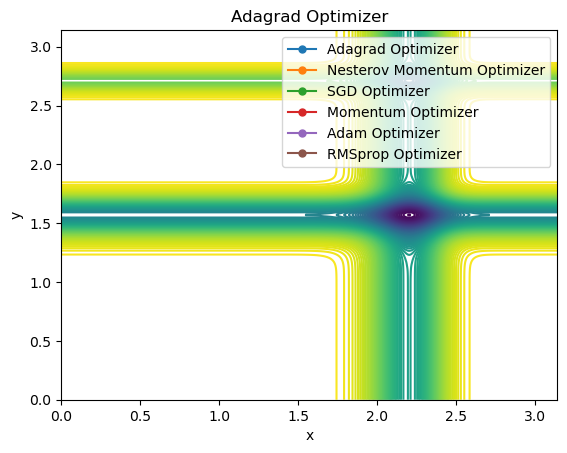

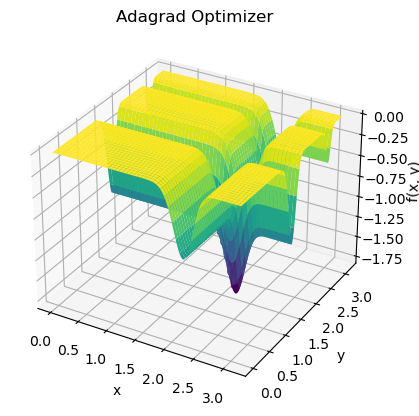

In [164]:
import numpy as np
import matplotlib.pyplot as plt

def michalewicz_function(X, m=10):
    x, y = X
    term1 = -np.sin(x) * (np.sin((1 * x**2) / np.pi)**(2*m))
    term2 = -np.sin(y) * (np.sin((2 * y**2) / np.pi)**(2*m))
    return term1 + term2

def gradient_michalewicz_function(X, m=10):
    x, y = X
    grad_x = -2 * m * np.cos(x) * (np.sin((1 * x**2) / np.pi)**(2*m-1)) * (1 * x * np.pi * (2*m))
    grad_y = -4 * m * np.cos(y) * (np.sin((2 * y**2) / np.pi)**(2*m-1)) * (2 * y * np.pi * (2*m))
    return np.array([grad_x, grad_y])



from mpl_toolkits.mplot3d import Axes3D

def plot_surface_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(0, np.pi, 400)
    y = np.linspace(0, np.pi, 400)
    X, Y = np.meshgrid(x, y)
    Z = target_function([X, Y])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], [target_function([p[0], p[1]]) for p in path], marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    #ax.legend()
    plt.show()

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(0, np.pi, 400)
    y = np.linspace(0, np.pi, 400)
    X, Y = np.meshgrid(x, y)
    Z = target_function([X, Y])

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()

def adagrad_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, m):
    p = initial_p
    G = np.zeros_like(p)
    path = [p]
    
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            gradient = gradient_michalewicz_function(p, m)
            G += gradient ** 2
            p -= lr * gradient / (np.sqrt(G) + 1e-7)
            step_path.append(p)
            
            if np.linalg.norm(gradient) < target_error:
                break
        path += step_path
    
    return path

def nesterov_momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, momentum, m):
    p = initial_p
    v = np.zeros_like(p)
    path = [p]
    
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            prev_v = v
            v = momentum * v + lr * gradient_michalewicz_function(p - momentum * prev_v, m)
            p -= v
            step_path.append(p)
            
            if np.linalg.norm(prev_v) < target_error:
                break
        path += step_path
    
    return path

def sgd_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, m):
    p = initial_p
    path = [p]
    for lr in learning_rates:
        step_path = [p]
    
        for step in range(max_steps):
            gradient = gradient_michalewicz_function(p, m)
            p -= lr * gradient
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, momentum, m):
    p = initial_p
    v = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            gradient = gradient_michalewicz_function(p, m)
            v = momentum * v - lr * gradient
            p += v
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def adam_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, beta1, beta2, epsilon, m):
    p = initial_p
    m_vals = np.zeros_like(p)
    v_vals = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):

            gradient = gradient_michalewicz_function(p, m)
            m_vals = beta1 * m_vals + (1 - beta1) * gradient
            v_vals = beta2 * v_vals + (1 - beta2) * gradient**2
            m_hat = m_vals / (1 - beta1**(step + 1))
            v_hat = v_vals / (1 - beta2**(step + 1))
            p -= lr * m_hat / (np.sqrt(v_hat + epsilon))
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def rmsprop_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, gamma, epsilon, m):
    p = initial_p
    G = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):  
            gradient = gradient_michalewicz_function(p, m)
            G = gamma * G + (1 - gamma) * gradient**2
            p -= lr * gradient / (np.sqrt(G) + epsilon)
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

target_error = 1e-6
max_steps = 1000
learning_rates = [0.1, 0.01, 0.001]
initial_p = np.array([1.0, 1.0])
m = 10  # Michalewicz function parameter

# Adagrad optimizer
adagrad_path = adagrad_optimizer(michalewicz_function, initial_p, target_error, max_steps, learning_rates, m)

# Nesterov Momentum optimizer
momentum_nesterov = 0.9  # Adjust the momentum parameter
nesterov_path = nesterov_momentum_optimizer(michalewicz_function, initial_p, target_error, max_steps, learning_rates, momentum_nesterov, m)

# SGD optimizer
sgd_learning_rate = 0.1  # Adjust the learning rate
sgd_path = sgd_optimizer(michalewicz_function, initial_p, target_error, max_steps, sgd_learning_rate, m)

# Momentum optimizer
momentum_rate = 0.9  # Adjust the momentum parameter
momentum_path = momentum_optimizer(michalewicz_function, initial_p, target_error, max_steps, learning_rates[0], momentum_rate, m)

# Adam optimizer
adam_learning_rate = 0.1  # Adjust the learning rate
adam_beta1 = 0.9
adam_beta2 = 0.999
adam_epsilon = 1e-8
adam_path = adam_optimizer(michalewicz_function, initial_p, target_error, max_steps, adam_learning_rate, adam_beta1, adam_beta2, adam_epsilon, m)

# RMSprop optimizer
rmsprop_learning_rate = 0.1  # Adjust the learning rate
rmsprop_gamma = 0.9
rmsprop_epsilon = 1e-8
rmsprop_path = rmsprop_optimizer(michalewicz_function, initial_p, target_error, max_steps, rmsprop_learning_rate, rmsprop_gamma, rmsprop_epsilon, m)

# Plot the contour and optimizer paths for all six optimizers
plot_contour_with_optimizer_path(
    michalewicz_function, 
    [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
    ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer']
)


plot_surface_with_optimizer_path(
    michalewicz_function, 
    [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
    ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer']
)

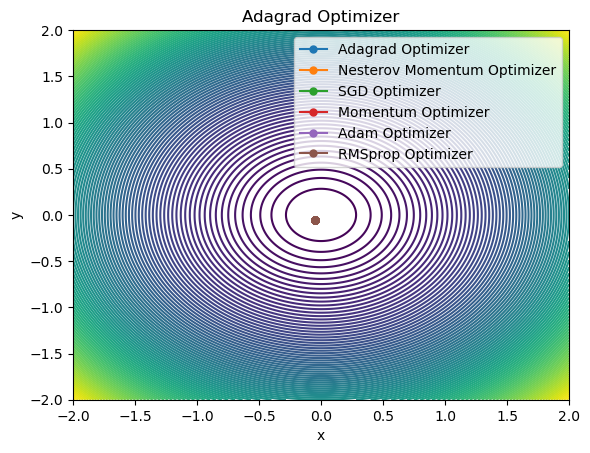

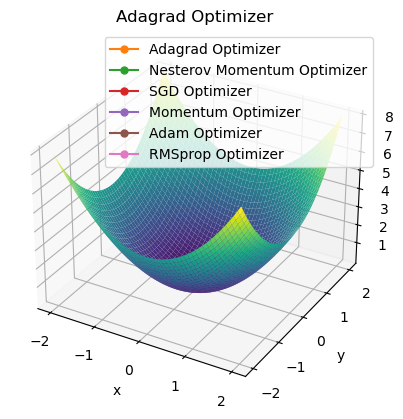

In [165]:
import numpy as np
import matplotlib.pyplot as plt

def sphere(p):
    return np.sum(p**2)

def gradient_sphere(p):
    return 2 * p

def adagrad_optimizer(target_function, initial_p, target_error, max_steps, learning_rates):
    p = initial_p
    G = np.zeros_like(p)
    path = [p]
    
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            gradient = gradient_sphere(p)
            G += gradient ** 2
            p -= lr * gradient / (np.sqrt(G) + 1e-7)
            step_path.append(p)
            
            if np.linalg.norm(gradient) < target_error:
                break
        path += step_path
    
    return path

def nesterov_momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, momentum):
    p = initial_p
    v = np.zeros_like(p)
    path = [p]
    
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps):
            prev_v = v
            v = momentum * v + lr * gradient_sphere(p - momentum * prev_v)
            p -= v
            step_path.append(p)
            
            if np.linalg.norm(prev_v) < target_error:
                break
        path += step_path
    
    return path

def sgd_optimizer(target_function, initial_p, target_error, max_steps, learning_rate):
    p = initial_p
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps): 
            gradient = gradient_sphere(p)
            p -= lr * gradient
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, momentum):
    p = initial_p
    v = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps): 
            gradient = gradient_sphere(p)
            v = momentum * v - lr * gradient
            p += v
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def adam_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, beta1, beta2, epsilon):
    p = initial_p
    m = np.zeros_like(p)
    v = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps): 
            gradient = gradient_sphere(p)
            m = beta1 * m + (1 - beta1) * gradient
            v = beta2 * v + (1 - beta2) * gradient**2
            m_hat = m / (1 - beta1**(step + 1))
            v_hat = v / (1 - beta2**(step + 1))
            p -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def rmsprop_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, gamma, epsilon):
    p = initial_p
    G = np.zeros_like(p)
    path = [p]
    for lr in learning_rates:
        step_path = [p]
        for step in range(max_steps): 
            gradient = gradient_sphere(p)
            G = gamma * G + (1 - gamma) * gradient**2
            p -= lr * gradient / (np.sqrt(G) + epsilon)
            step_path.append(p)

            if np.linalg.norm(gradient) < target_error:
                break
            path += step_path

        return path

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[sphere(np.array([x, y])) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
            
    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()
    


from mpl_toolkits.mplot3d import Axes3D

def plot_surface_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array([[target_function(np.array([x, y])) for x, y in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        function_values = [target_function(np.array([p[0], p[1]])) for p in path]
        ax.plot(path[:, 0], path[:, 1], function_values, marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    plt.show()



target_error = 1e-13
max_steps = 1000
learning_rates = [0.1, 0.01, 0.001]
initial_p = np.array([1.0, 1.0])

# Adagrad optimizer
adagrad_path = adagrad_optimizer(sphere, initial_p, target_error, max_steps, learning_rates)

# Nesterov Momentum optimizer
momentum_nesterov = 0.9  # Adjust the momentum parameter
nesterov_path = nesterov_momentum_optimizer(sphere, initial_p, target_error, max_steps, learning_rates, momentum_nesterov)

# SGD optimizer
sgd_learning_rate = 0.1  # Adjust the learning rate
sgd_path = sgd_optimizer(sphere, initial_p, target_error, max_steps, sgd_learning_rate)

# Momentum optimizer
momentum_rate = 0.9  # Adjust the momentum parameter
momentum_path = momentum_optimizer(sphere, initial_p, target_error, max_steps, learning_rates[0], momentum_rate)

# Adam optimizer
adam_learning_rate = 0.1  # Adjust the learning rate
adam_beta1 = 0.9
adam_beta2 = 0.999
adam_epsilon = 1e-8
adam_path = adam_optimizer(sphere, initial_p, target_error, max_steps, adam_learning_rate, adam_beta1, adam_beta2, adam_epsilon)

# RMSprop optimizer
rmsprop_learning_rate = 0.1  # Adjust the learning rate
rmsprop_gamma = 0.9
rmsprop_epsilon = 1e-8
rmsprop_path = rmsprop_optimizer(sphere, initial_p, target_error, max_steps, rmsprop_learning_rate, rmsprop_gamma, rmsprop_epsilon)

# Plot the contour and optimizer paths for all six optimizers
plot_contour_with_optimizer_path(
    sphere, 
    [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
    ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer']
)
plot_surface_with_optimizer_path(
    sphere, 
    [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
    ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer']
)



loss_values_rms [2.86746752 0.56004831]


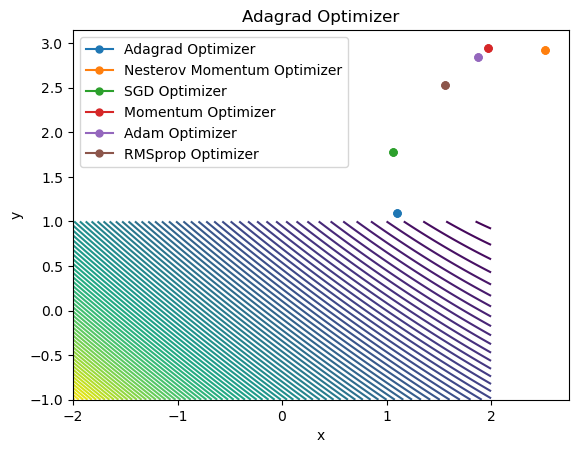

ValueError: could not broadcast input array from shape (2,) into shape (400,400)

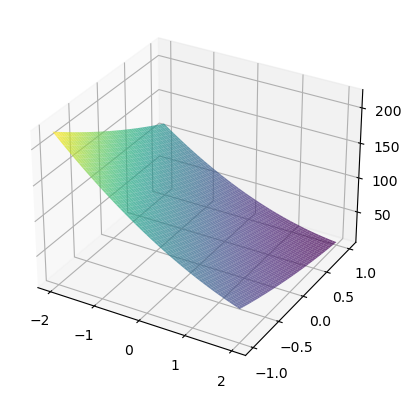

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def booth(p):
    x, y = p
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def gradient_booth(p):
    x, y = p
    grad_x = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    grad_y = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([grad_x, grad_y])

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array(target_function(([X, Y])))

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()

    
from mpl_toolkits.mplot3d import Axes3D

def plot_surface_with_optimizer_path(target_function, paths, titles,function_values):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array(target_function(([X, Y])))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
           
        
        
       # ax1.plot(trajectory[:, 0], trajectory[:, 1], loss_values, marker='o', color='red')

    for path, title,function_value in zip(paths, titles,function_values):
        path = np.array(path)
        
        function_value = np.full(X.shape, function_value)
        
        
        print(path)
        print(title)
        print(function_value)
        ax.set_title(title)
        ax.plot(path[:, 0], path[:, 1], function_value, marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.legend()
    plt.show()

def adagrad_optimizer(target_function, initial_p, target_error, max_steps, learning_rates):
    p = initial_p
    G = np.zeros_like(p)
    path = [p]
    loss_values_adag=[target_function(p)]
    
    step_path = [p]
    for step in range(max_steps):
        gradient = gradient_booth(p)
        G += gradient ** 2
        prev_p = p
        p -= lr * gradient / (np.sqrt(G + 1e-7))
        step_path.append(p)        
        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path.extend(step_path)
    loss_values_adag.append(target_function(p))
    
    return path,loss_values_adag

# Repeat this structure for other optimizers


def nesterov_momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rates, momentum):
    p = initial_p
    v = np.zeros_like(p)
    path = [p]
    step_path = [p]
    loss_values_nst=[target_function(p)]
    for step in range(max_steps):
        prev_v = v
        v = momentum * v + lr * gradient_booth(p - momentum * prev_v)
        prev_p = p
        p -= v
        step_path.append(p)
        
        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path.extend(step_path)
    loss_values_nst.append(target_function(p))
    
    
    return path,loss_values_nst

def sgd_optimizer(target_function, initial_p, target_error, max_steps, learning_rate):
    p = initial_p
    path = [p]
    loss_values_sgd=[target_function(p)]
    step_path = [p]
    for step in range(max_steps):
        gradient = gradient_booth(p)
        prev_p = p
        p -= lr * gradient
        step_path.append(p)

        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path.extend(step_path)
    loss_values_sgd.append(target_function(p))
    
    return path,loss_values_sgd

def momentum_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, momentum):
    p = initial_p
    v = np.zeros_like(p)
    loss_values_mmt=[target_function(p)]
    path_mm = [p]
    step_path = [p]
    for step in range(max_steps):
        gradient = gradient_booth(p)
        prev_p = p
        v = momentum * v - lr * gradient
        p += v
        step_path.append(p)
        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path_mm.extend(step_path)
    loss_values_mmt.append(target_function(p))
        
    return path_mm,loss_values_mmt

def adam_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, beta1, beta2, epsilon):
    p = initial_p
    m = np.zeros_like(p)
    v = np.zeros_like(p)
    path = [p]
    loss_values_adam=[target_function(p)]
    step_path = [p]
    for step in range(max_steps):
        gradient = gradient_booth(p)
        
        prev_p = p
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * gradient**2
        m_hat = m / (1 - beta1**(step + 1))
        v_hat = v / (1 - beta2**(step + 1))
        p -= lr * m_hat / (np.sqrt(v_hat + epsilon))
        step_path.append(p)

        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path.extend(step_path)
    loss_values_adam.append(target_function(p))

    return path,loss_values_adam

def rmsprop_optimizer(target_function, initial_p, target_error, max_steps, learning_rate, gamma, epsilon):
    p = initial_p
    G = np.zeros_like(p)
    loss_values_rms=[target_function(p)]
    path = [p]
    
    step_path = [p]
    for step in range(max_steps):
        gradient = gradient_booth(p)
        prev_p = p
        G = gamma * G + (1 - gamma) * gradient**2
        p -= lr * gradient / (np.sqrt(G + epsilon))
        step_path.append(p)

        if np.abs(target_function(prev_p) - target_function(p)) < target_error:
            break
    path.extend(step_path)
    loss_values_rms.append(target_function(p))

    return path,loss_values_rms

target_error = 1e-13
max_steps = 10000
learning_rates = [0.1, 0.01, 0.001]
initial_p = np.array([1.0, 1.0])
for lr in learning_rates:
    

# Adagrad optimizer
    adagrad_path,loss_values_adag = adagrad_optimizer(booth, initial_p, target_error, max_steps, lr)
    adagrad_path=np.array(adagrad_path)
    loss_values_adag=np.array(loss_values_adag)

    # Nesterov Momentum optimizer
    momentum_nesterov = 0.9  # Adjust the momentum parameter
    nesterov_path,loss_values_nst  = nesterov_momentum_optimizer(booth, initial_p, target_error, max_steps, lr, momentum_nesterov)
    nesterov_path=np.array(nesterov_path)
    loss_values_nst=np.array(loss_values_nst)

    # SGD optimizer
    sgd_path,loss_values_sgd  = sgd_optimizer(booth, initial_p, target_error, max_steps, lr)
    sgd_path=np.array(sgd_path)
    loss_values_sgd=np.array(loss_values_sgd)

    # Momentum optimizer
    momentum_rate = 0.9  # Adjust the momentum parameter
    momentum_path,loss_values_mmt = momentum_optimizer(booth, initial_p, target_error, max_steps, lr, momentum_rate)
    momentum_path=np.array(momentum_path)
    loss_values_mmt=np.array(loss_values_mmt)
    # Adam optimizer
    adam_beta1 = 0.9
    adam_beta2 = 0.999
    adam_epsilon = 1e-8
    adam_path,loss_values_adam = adam_optimizer(booth, initial_p, target_error, max_steps, lr, adam_beta1, adam_beta2, adam_epsilon)
    adam_path=np.array(adam_path)
    loss_values_adam=np.array(loss_values_adam)
    # RMSprop optimizer
    rmsprop_gamma = 0.9
    rmsprop_epsilon = 1e-8
    rmsprop_path,loss_values_rms = rmsprop_optimizer(booth, initial_p, target_error, max_steps, lr, rmsprop_gamma, rmsprop_epsilon)
    rmsprop_path=np.array(rmsprop_path)
    loss_values_rms=np.array(loss_values_rms)
    print("loss_values_rms",loss_values_rms)
# Plot the contour and optimizer paths for all six optimizers
    plot_contour_with_optimizer_path(
        booth, 
        [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
        ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer']
    )

    plot_surface_with_optimizer_path(
        booth, 
        [adagrad_path, nesterov_path, sgd_path, momentum_path, adam_path, rmsprop_path], 
        ['Adagrad Optimizer', 'Nesterov Momentum Optimizer', 'SGD Optimizer', 'Momentum Optimizer', 'Adam Optimizer', 'RMSprop Optimizer'],
        [loss_values_adag,loss_values_nst,loss_values_sgd,loss_values_mmt,loss_values_adam,loss_values_rms,]
    )

Testing optimizer for learning rate = 0.1, initial point = [0.5 0.5]
sgd: Minimum found at p = [2975.7975 2500.75  ], Steps = 10001
momentum: Minimum found at p = [29726.69999999 24980.5       ], Steps = 10001
nesterov_momentum: Minimum found at p = [-29728.3775 -24981.75  ], Steps = 10001
adagrad: Minimum found at p = [0.6 0.6], Steps = 1
rmsprop: Minimum found at p = [0.91622773 0.91622772], Steps = 1
adam: Minimum found at p = [1927.19116146 1927.19050465], Steps = 10001
Testing optimizer for learning rate = 0.1, initial point = [-0.5 -0.5]
sgd: Minimum found at p = [-2975.7975 -2500.75  ], Steps = 10001
momentum: Minimum found at p = [-29726.69999999 -24980.5       ], Steps = 10001
nesterov_momentum: Minimum found at p = [29728.3775 24981.75  ], Steps = 10001
adagrad: Minimum found at p = [-0.6 -0.6], Steps = 1
rmsprop: Minimum found at p = [-0.91622773 -0.91622772], Steps = 1
adam: Minimum found at p = [-1927.19116146 -1927.19050465], Steps = 10001
Testing optimizer for learning r

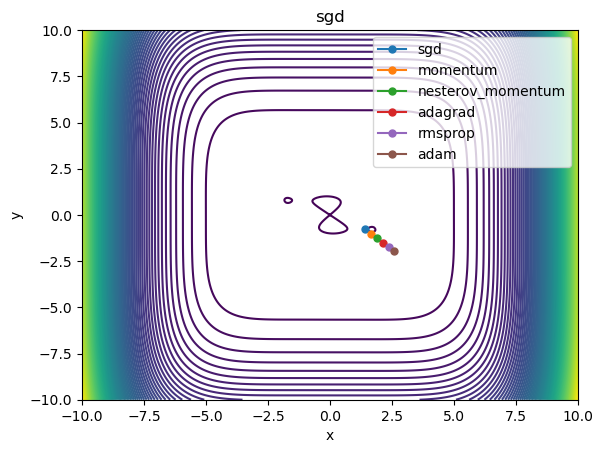

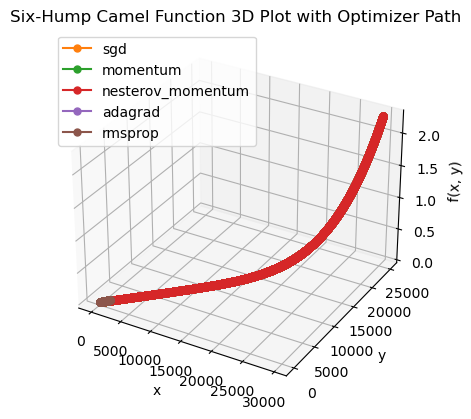

Testing optimizer for learning rate = 0.01, initial point = [0.91622773 0.91622772]
sgd: Minimum found at p = [319.26502794  26.95931423], Steps = 10001
momentum: Minimum found at p = [3181.53937711  261.1127285 ], Steps = 10001
nesterov_momentum: Minimum found at p = [-3179.99340692  -259.30370949], Steps = 10001
adagrad: Minimum found at p = [0.92622773 0.92622772], Steps = 1
rmsprop: Minimum found at p = [0.95785051 0.95785042], Steps = 1
adam: Minimum found at p = [ 193.58534355 -191.66959158], Steps = 10001
Testing optimizer for learning rate = 0.01, initial point = [-0.91622773 -0.91622772]
sgd: Minimum found at p = [-319.26502794  -26.95931423], Steps = 10001
momentum: Minimum found at p = [-3181.53937711  -261.1127285 ], Steps = 10001
nesterov_momentum: Minimum found at p = [3179.99340692  259.30370949], Steps = 10001
adagrad: Minimum found at p = [-0.92622773 -0.92622772], Steps = 1
rmsprop: Minimum found at p = [-0.95785051 -0.95785042], Steps = 1
adam: Minimum found at p = [

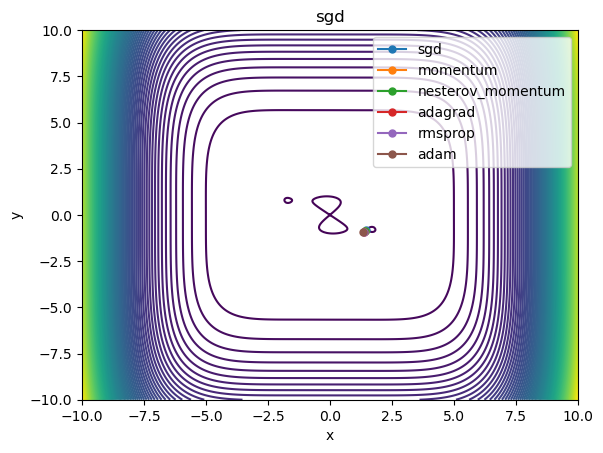

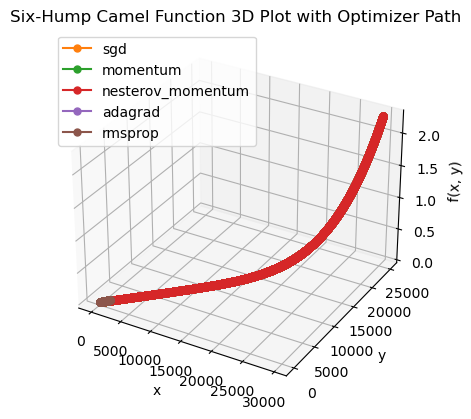

Testing optimizer for learning rate = 0.001, initial point = [0.95785051 0.95785042]
sgd: Minimum found at p = [31.10053304 -2.297437  ], Steps = 10001
momentum: Minimum found at p = [302.11341888 -31.56572911], Steps = 10001
nesterov_momentum: Minimum found at p = [-300.22484357   33.4843594 ], Steps = 10001
adagrad: Minimum found at p = [0.95885051 0.95685042], Steps = 1
rmsprop: Minimum found at p = [0.96201278 0.95368814], Steps = 1
adam: Minimum found at p = [ 20.22476208 -18.30905493], Steps = 10001
Testing optimizer for learning rate = 0.001, initial point = [-0.95785051 -0.95785042]
sgd: Minimum found at p = [-31.10053304   2.297437  ], Steps = 10001
momentum: Minimum found at p = [-302.11341888   31.56572911], Steps = 10001
nesterov_momentum: Minimum found at p = [300.22484357 -33.4843594 ], Steps = 10001
adagrad: Minimum found at p = [-0.95885051 -0.95685042], Steps = 1
rmsprop: Minimum found at p = [-0.96201278 -0.95368814], Steps = 1
adam: Minimum found at p = [-20.22476208

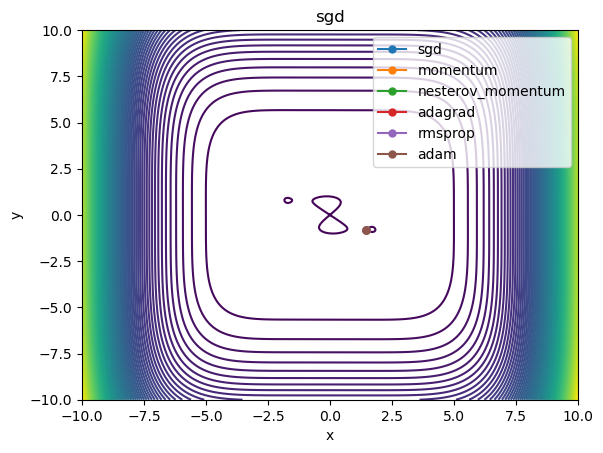

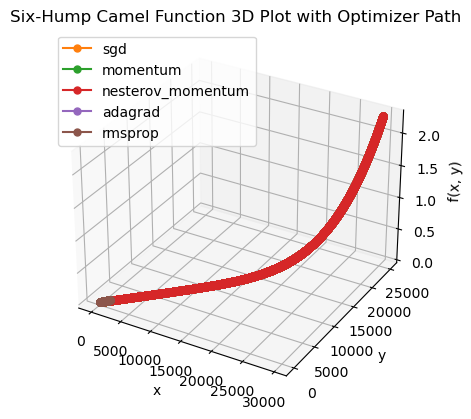

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Six-Hump Camel Function
def six_hump_camel(p):
    x, y = p[0], p[1]
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

# Define the gradient of the Six-Hump Camel Function
def gradient_six_hump_camel(p):
    x, y = p[0], p[1]
    df_dx = 2 * x * (2.1 * x**2 - 4) + y
    df_dy = x + 8 * y**3 - 8 * y
    return np.array([df_dx, df_dy])

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array(target_function(([X, Y])))

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[0], path[1], marker='o', markersize=5, label=title)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()

    
from mpl_toolkits.mplot3d import Axes3D
def plot_surface_with_optimizer_path(target_function, paths, titles, function_values):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = six_hump_camel([X, Y])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        
    for path, title, function_value in zip(paths, titles, function_values):
        path = np.array(path)
        X_path, Y_path = path[:, 0], path[:, 1]
        Z_path = function_value * np.ones(X_path.shape)
        
        ax.plot(X_path, Y_path, Z_path, marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Six-Hump Camel Function 3D Plot with Optimizer Path')
    ax.legend()
    plt.show()




def sgd(p, lr, grad):
    p = p - lr * grad
    return p



def momentum(p, lr, grad, velocity, momentum):
    velocity = momentum * velocity - lr * grad
    p = p + velocity
    return p, velocity


#def nesterov_momentum(p, lr, grad, prev_momentum, beta):
   # lookahead_momentum = beta * prev_momentum + lr * gradient_sphere(p)
    #return p - lookahead_momentum

def nesterov_momentum(p, lr, grad, prev_velocity, momentum):
    velocity = momentum * prev_velocity + lr * grad
    p = p - momentum * prev_velocity + (1 + momentum) * velocity
    return p, velocity




def adagrad(p, lr, grad, historical_squared_gradients, epsilon):
    historical_squared_gradients += grad ** 2
    p -= lr * grad / (np.sqrt(historical_squared_gradients) + epsilon)
    return p, historical_squared_gradients




def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * (grad ** 2)
    p -= lr * grad / (np.sqrt(G) + epsilon)
   
    return p, G



def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    # Update the first moment estimate (mean of gradients)
    m = beta1 * m + (1 - beta1) * grad
    # Update the second moment estimate (uncentered variance of gradients)
    v = beta2 * v + (1 - beta2) * (grad ** 2)
   
    # Bias correction for first and second moments
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
   
    # Update the parameter
    p -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
   
    return p, m, v

# Define a function to visualize the optimizer trajectory for the Six-Hump Camel Function
def visualize_optimizer_trajectory_six_hump(optimizer, initial_p, target_error, max_steps):
    p = initial_p
    grad = 0
    steps = 0
    decay=0.9
    trajectory = [p]
    loss_values = [six_hump_camel(p)]
    beta=0.9
    beta2=0.999
    epsilon = 1e-7  # Added epsilon for stability

    if optimizer in [adagrad, rmsprop]:
        G = np.zeros_like(p)
    elif optimizer == adam:
        m = np.zeros_like(p)
        v = np.zeros_like(p)
        t = 0

    prev_momentum = np.zeros_like(p)  # Initialize prev_momentum
    grad = gradient_six_hump_camel(p)
    while steps <=max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            m = beta1 * m + (1 - beta) * grad
            v = beta2 * v + (1 - beta2) * grad**2
            t += 1
            m_hat = m / (1 - beta ** t) if t > 0 else 0
            v_hat = v / (1 - beta2 ** t) if t > 0 else 0
            p = p - (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
       
        if optimizer == adam:
            p,m,v = optimizer(p, lr, grad, m, v, beta, beta2, epsilon, t)

        elif optimizer == adagrad:
            p,G = optimizer(p, lr, grad, G, epsilon)

        elif optimizer == rmsprop:
            p,G = optimizer(p, lr, grad, G, decay, epsilon)

        elif optimizer == momentum:
            p,prev_momentum = optimizer(p, lr, grad, prev_momentum, beta)

        elif optimizer == nesterov_momentum:
            p,lookahead_momentum = optimizer(p, lr, grad, prev_momentum, beta)
            prev_momentum = lookahead_momentum
        else:
            p = optimizer(p, lr, grad)

       
        steps += 1
        trajectory.append(p)
        loss_values.append(six_hump_camel(p))

        if np.linalg.norm(prev_p - p) < target_error:
            break

    return p, steps, trajectory, np.array(loss_values)

# Testing with different learning rates and initial points
learning_rates = [0.1, 0.01, 0.001]
initial_p_values = [np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([1.0, -1.0])]
target_error = 1e-6
max_steps = 10000
beta1 = 0.9
beta2 = 0.999
patj=[]
function_vlaues=[]

for lr in learning_rates:
    for initial_p in initial_p_values:
        print(f"Testing optimizer for learning rate = {lr}, initial point = {initial_p}")
        for optimizer in [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]:
            result_p, steps, trajectory, loss_values = visualize_optimizer_trajectory_six_hump(optimizer, initial_p, target_error, max_steps)
            print(f"{optimizer.__name__}: Minimum found at p = {result_p}, Steps = {steps}")

            trajectory = np.array(trajectory)
            loss_values = np.array(loss_values)
            path.append(trajectory)
            function_vlaues.append(loss_values)
    plot_contour_with_optimizer_path(
        six_hump_camel, 
        trajectory, 
        ["sgd", "momentum", "nesterov_momentum", "adagrad", "rmsprop", "adam"])
    plot_surface_with_optimizer_path(
    six_hump_camel, 
    path, 
    ["sgd", "momentum", "nesterov_momentum", "adagrad", "rmsprop", "adam"],
    function_values)

            


In [ ]:
fig = plt.figure(figsize=(14, 6))
            print("trajectory:",trajectory)

            print("##########")
            print("loss_values",loss_values)
            # Create a meshgrid for 3D plot
            x_range = np.linspace(-1000, 1000, 400)
            y_range = np.linspace(-1000, 1000, 200)
            X, Y = np.meshgrid(x_range, y_range)
            Z = six_hump_camel([X, Y])

            # 3D Plot with optimizer path
            ax1 = fig.add_subplot(121, projection='3d')
            ax1.set_xlabel('x')
            ax1.set_ylabel('y')
            ax1.set_zlabel('Function Value')
            ax1.set_title('Six-Hump Camel Function 3D Plot with Optimizer Path')
            ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
            ax1.plot(trajectory[:, 0], trajectory[:, 1], loss_values, marker='o', color='red')

            # Contour Plot with optimizer path
            ax2 = fig.add_subplot(122)
            ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
            ax2.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red')
            ax2.set_xlabel('x')
            ax2.set_ylabel('y')
            ax2.set_title(f"{optimizer.__name__}: Minimum found at p = {result_p}, Steps = {steps}")

            #plt.show()


Testing optimizer for learning rate = 0.1, initial point = [0.5 0.5]
sgd: Minimum found at p = [2975.7975 2500.75  ], Steps = 10001
momentum: Minimum found at p = [29726.69999999 24980.5       ], Steps = 10001
nesterov_momentum: Minimum found at p = [29726.69999999 24980.5       ], Steps = 10001
adagrad: Minimum found at p = [20.35546446 20.35546446], Steps = 10001
rmsprop: Minimum found at p = [1001.51413763 1001.51413123], Steps = 10001


C:\Users\User\AppData\Local\Temp\ipykernel_13532\2829623544.py:87: RuntimeWarning: divide by zero encountered in divide
  m_hat = m / (1 - beta1**t)
C:\Users\User\AppData\Local\Temp\ipykernel_13532\2829623544.py:88: RuntimeWarning: divide by zero encountered in divide
  v_hat = v / (1 - beta2**t)
C:\Users\User\AppData\Local\Temp\ipykernel_13532\2829623544.py:89: RuntimeWarning: invalid value encountered in divide
  p = p - lr * m_hat / (np.sqrt(v_hat) + epsilon)


adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[ 0.5       ,  0.5       ],
       [ 0.6       ,  0.6       ],
       [ 0.67071067,  0.67071067],
       ...,
       [20.35346451, 20.35346451],
       [20.35446451, 20.35446451],
       

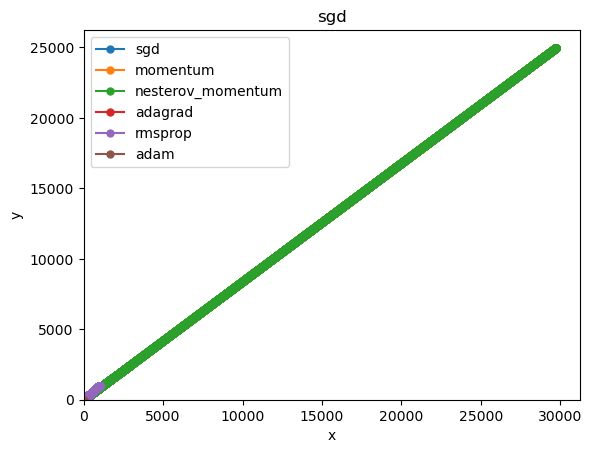

Testing optimizer for learning rate = 0.1, initial point = [-0.5 -0.5]
sgd: Minimum found at p = [-2975.7975 -2500.75  ], Steps = 10001
momentum: Minimum found at p = [-29726.69999999 -24980.5       ], Steps = 10001
nesterov_momentum: Minimum found at p = [-29726.69999999 -24980.5       ], Steps = 10001
adagrad: Minimum found at p = [-20.35546446 -20.35546446], Steps = 10001
rmsprop: Minimum found at p = [-1001.51413763 -1001.51413123], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.498

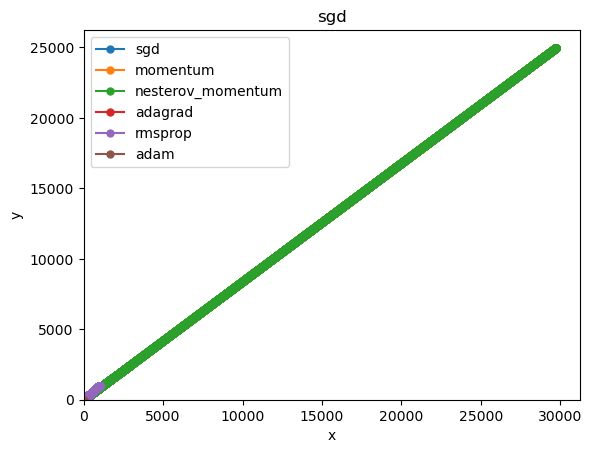

Testing optimizer for learning rate = 0.1, initial point = [ 1. -1.]
sgd: Minimum found at p = [ 4801.48 -1001.1 ], Steps = 10001
momentum: Minimum found at p = [47962.60000001 -9993.        ], Steps = 10001
nesterov_momentum: Minimum found at p = [47962.60000001 -9993.        ], Steps = 10001
adagrad: Minimum found at p = [ 20.85546447 -20.8554644 ], Steps = 10001
rmsprop: Minimum found at p = [ 1002.01415045 -1002.01407106], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]

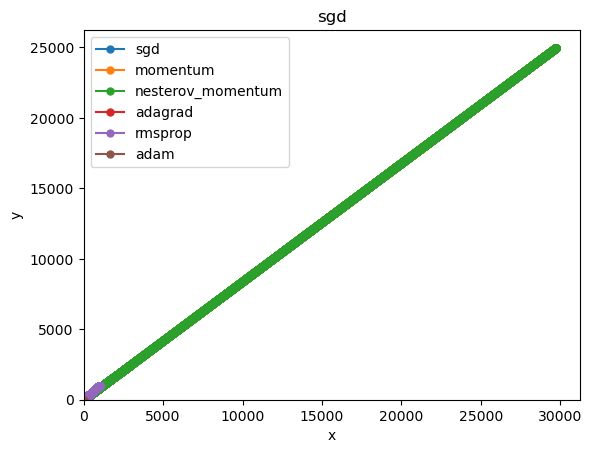

Testing optimizer for learning rate = 0.01, initial point = [0.5 0.5]
sgd: Minimum found at p = [298.02975 250.525  ], Steps = 10001
momentum: Minimum found at p = [2973.12 2498.5 ], Steps = 10001
nesterov_momentum: Minimum found at p = [2973.12 2498.5 ], Steps = 10001
adagrad: Minimum found at p = [2.48554645 2.48554645], Steps = 10001
rmsprop: Minimum found at p = [100.60141376 100.60141312], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-01, 5.00000

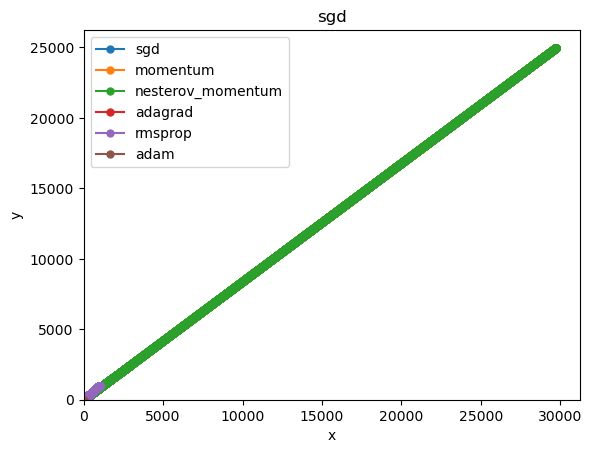

Testing optimizer for learning rate = 0.01, initial point = [-0.5 -0.5]
sgd: Minimum found at p = [-298.02975 -250.525  ], Steps = 10001
momentum: Minimum found at p = [-2973.12 -2498.5 ], Steps = 10001
nesterov_momentum: Minimum found at p = [-2973.12 -2498.5 ], Steps = 10001
adagrad: Minimum found at p = [-2.48554645 -2.48554645], Steps = 10001
rmsprop: Minimum found at p = [-100.60141376 -100.60141312], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e

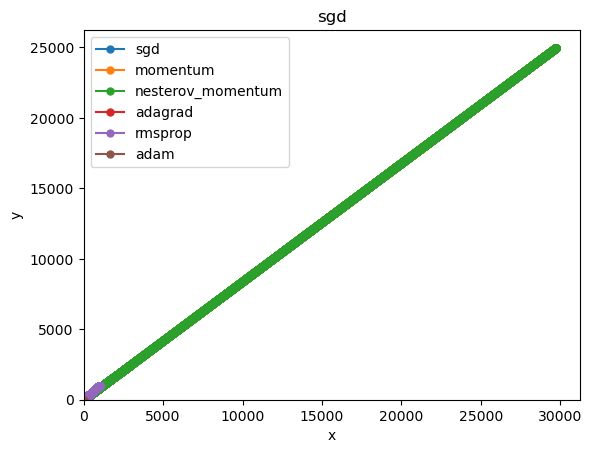

Testing optimizer for learning rate = 0.01, initial point = [ 1. -1.]
sgd: Minimum found at p = [ 481.048 -101.01 ], Steps = 10001
momentum: Minimum found at p = [ 4797.16 -1000.2 ], Steps = 10001
nesterov_momentum: Minimum found at p = [ 4797.16 -1000.2 ], Steps = 10001
adagrad: Minimum found at p = [ 2.98554645 -2.98554644], Steps = 10001
rmsprop: Minimum found at p = [ 101.10141504 -101.10140711], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-01, 5

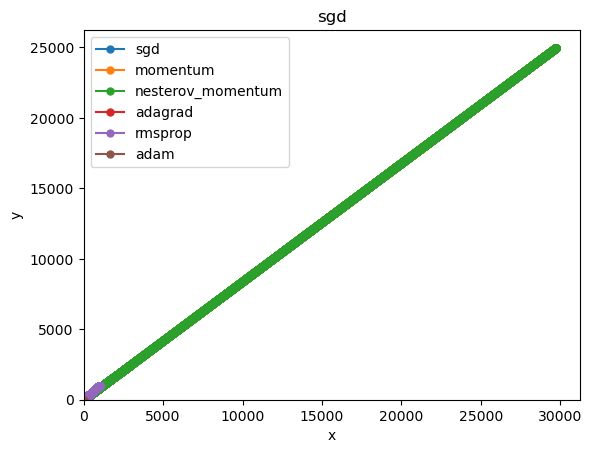

Testing optimizer for learning rate = 0.001, initial point = [0.5 0.5]
sgd: Minimum found at p = [30.252975 25.5025  ], Steps = 10001
momentum: Minimum found at p = [297.762 250.3  ], Steps = 10001
nesterov_momentum: Minimum found at p = [297.762 250.3  ], Steps = 10001
adagrad: Minimum found at p = [0.69855464 0.69855464], Steps = 10001
rmsprop: Minimum found at p = [10.51014138 10.51014131], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-01, 5.000000

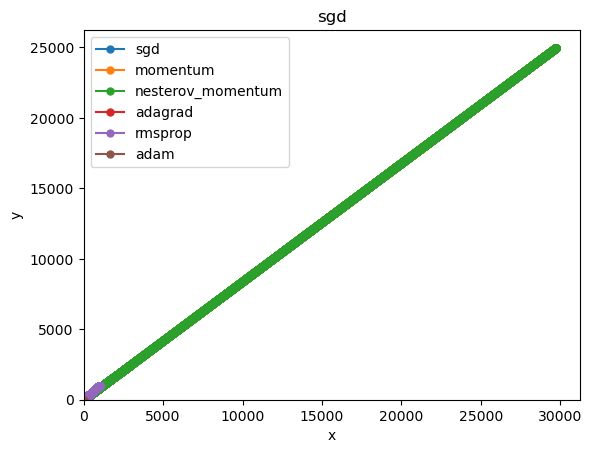

Testing optimizer for learning rate = 0.001, initial point = [-0.5 -0.5]
sgd: Minimum found at p = [-30.252975 -25.5025  ], Steps = 10001
momentum: Minimum found at p = [-297.762 -250.3  ], Steps = 10001
nesterov_momentum: Minimum found at p = [-297.762 -250.3  ], Steps = 10001
adagrad: Minimum found at p = [-0.69855464 -0.69855464], Steps = 10001
rmsprop: Minimum found at p = [-10.51014138 -10.51014131], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-

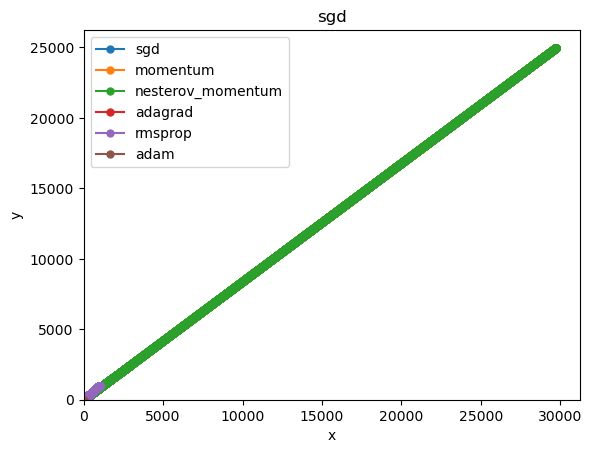

Testing optimizer for learning rate = 0.001, initial point = [ 1. -1.]
sgd: Minimum found at p = [ 49.0048 -11.001 ], Steps = 10001
momentum: Minimum found at p = [ 480.616 -100.92 ], Steps = 10001
nesterov_momentum: Minimum found at p = [ 480.616 -100.92 ], Steps = 10001
adagrad: Minimum found at p = [ 1.19855464 -1.19855464], Steps = 10001
rmsprop: Minimum found at p = [ 11.0101415  -11.01014071], Steps = 10001
adam: Minimum found at p = [nan nan], Steps = 10001
RRRRRRRR [array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.0950000e+00, 1.0000000e+00],
       ...,
       [2.9752025e+03, 2.5002500e+03],
       [2.9755000e+03, 2.5005000e+03],
       [2.9757975e+03, 2.5007500e+03]]), array([[5.0000000e-01, 5.0000000e-01],
       [7.9750000e-01, 7.5000000e-01],
       [1.3627500e+00, 1.2250000e+00],
       ...,
       [2.9720750e+04, 2.4975500e+04],
       [2.9723725e+04, 2.4978000e+04],
       [2.9726700e+04, 2.4980500e+04]]), array([[5.0000000e-01, 5.

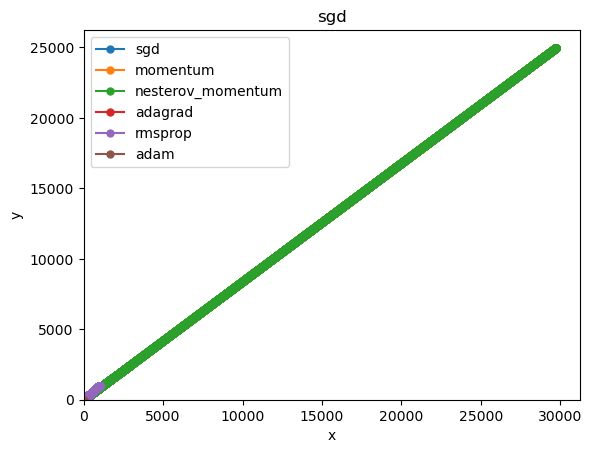

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Six-Hump Camel Function
def six_hump_camel(p):
    x, y = p[0], p[1]
    return (4 - 2.1 * x**2 + x**4 / 3) * x**2 + x * y + (-4 + 4 * y**2) * y**2

# Define the gradient of the Six-Hump Camel Function
def gradient_six_hump_camel(p):
    x, y = p[0], p[1]
    df_dx = 2 * x * (2.1 * x**2 - 4) + y
    df_dy = x + 8 * y**3 - 8 * y
    return np.array([df_dx, df_dy])

def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array(target_function([X, Y]))

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()

def plot_surface_with_optimizer_path(target_function, paths, titles, function_values):
    x = np.linspace(-2, 2, 400)
    y = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x, y)
    Z = six_hump_camel([X, Y])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        
    for path, title, function_value in zip(paths, titles, function_values):
        path = np.array(path)
        X_path, Y_path = path[:, 0], path[:, 1]
        Z_path = function_value * np.ones(X_path.shape)
        
        ax.plot(X_path, Y_path, Z_path, marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Six-Hump Camel Function 3D Plot with Optimizer Path')
    ax.legend()
    plt.show()

def sgd(p, lr, grad):
    p = p - lr * grad
    return p

def momentum(p, lr, grad, velocity, momentum):
    velocity = momentum * velocity - lr * grad
    p = p + velocity
    return p, velocity

def nesterov_momentum(p, lr, grad, prev_velocity, momentum):
    velocity = momentum * prev_velocity - lr * grad
    p = p + velocity
    return p, velocity

def adagrad(p, lr, grad, historical_squared_gradients, epsilon):
    historical_squared_gradients += grad ** 2
    p = p - lr * grad / (np.sqrt(historical_squared_gradients) + epsilon)
    return p, historical_squared_gradients

def rmsprop(p, lr, grad, G, decay, epsilon):
    G = decay * G + (1 - decay) * (grad ** 2)
    p = p - lr * grad / (np.sqrt(G) + epsilon)
    return p, G

def adam(p, lr, grad, m, v, beta1, beta2, epsilon, t):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    p = p - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return p, m, v

def visualize_optimizer_trajectory_six_hump(optimizer, initial_p, target_error, max_steps):
    p = initial_p
    grad = 0
    steps = 0
    decay = 0.9
    trajectory = [p]
    loss_values = [six_hump_camel(p)]
    beta = 0.9
    beta2 = 0.999
    epsilon = 1e-7

    if optimizer in [adagrad, rmsprop]:
        G = np.zeros_like(p)
    elif optimizer == adam:
        m = np.zeros_like(p)
        v = np.zeros_like(p)
        t = 0

    prev_velocity = np.zeros_like(p)
    grad = gradient_six_hump_camel(p)

    while steps <= max_steps:
        prev_p = p
        prev_grad = grad

        if optimizer == adam:
            p,m, v = optimizer(p, lr, grad, m, v, beta, beta2, epsilon, t)
            t += 1
        elif optimizer == adagrad:
            p, G = optimizer(p, lr, grad, G, epsilon)
        elif optimizer == rmsprop:
            p, G = optimizer(p, lr, grad, G, decay, epsilon)
        elif optimizer == momentum:
            p, prev_velocity = optimizer(p, lr, grad, prev_velocity, beta)
        elif optimizer == nesterov_momentum:
            p, prev_velocity = optimizer(p, lr, grad, prev_velocity, beta)
        else:
            p = optimizer(p, lr, grad)

        steps += 1
        trajectory.append(p)
        loss_values.append(six_hump_camel(p))

        if np.linalg.norm(prev_p - p) < target_error:
            break

    return p, steps, trajectory, np.array(loss_values)

# Testing with different learning rates and initial points
learning_rates = [0.1, 0.01, 0.001]
initial_p_values = [np.array([0.5, 0.5]), np.array([-0.5, -0.5]), np.array([1.0, -1.0])]
target_error = 1e-6
max_steps = 10000
beta1 = 0.9
beta2 = 0.999
path = []
function_values = []

for lr in learning_rates:
    for initial_p in initial_p_values:
        print(f"Testing optimizer for learning rate = {lr}, initial point = {initial_p}")
        optimizer_names = ["sgd", "momentum", "nesterov_momentum", "adagrad", "rmsprop", "adam"]
        optimizer_functions = [sgd, momentum, nesterov_momentum, adagrad, rmsprop, adam]

        for optimizer, optimizer_name in zip(optimizer_functions, optimizer_names):
            result_p, steps, trajectory, loss_values = visualize_optimizer_trajectory_six_hump(optimizer, initial_p, target_error, max_steps)
            print(f"{optimizer_name}: Minimum found at p = {result_p}, Steps = {steps}")

            trajectory = np.array(trajectory)
            loss_values = np.array(loss_values)
            path.append(trajectory)
            function_values.append(loss_values)
        print("RRRRRRRR",path)
# Plot the contour and optimizer paths for all six optimizers
        plot_contour_with_optimizer_path(
            six_hump_camel, 
            path, 
            ["sgd", "momentum", "nesterov_momentum", "adagrad", "rmsprop", "adam"])



In [ ]:
def plot_surface_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = six_hump_camel([X, Y])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
        
    for path, title, function_value in zip(paths, titles):
        path = np.array(path)
        X_path, Y_path = path[:, 0], path[:, 1]
        Z_path = function_value * np.ones(X_path.shape)
        
        ax.plot(X_path, Y_path, Z_path, marker='o', markersize=5, label=title)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('Six-Hump Camel Function 3D Plot with Optimizer Path')
    ax.legend()
    plt.show()
    
    
def plot_contour_with_optimizer_path(target_function, paths, titles):
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = np.array(target_function([X, Y]))

    plt.figure()
    plt.contour(X, Y, Z, levels=100, cmap='viridis')
    plt.title(titles[0])

    for path, title in zip(paths, titles):
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], marker='o', markersize=5, label=title)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.show()